RNN AUTO-CORRECT MODEL - BASELINE
Vocabulary size: 69
Embedding dimension: 64
RNN hidden units: 128
Max sequence length: 8
Training samples: 2400
Dropout rate: 0.2

MODEL ARCHITECTURE


Model: "RNN_AutoCorrect"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_layer     │ (None, 8, 64)     │      4,416 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_dropout   │ (None, 8, 64)     │          0 │ embedding_layer[… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 8)         │          0 │ input_layer[0][0] │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rnn_layer           │ (None, 8, 128)    │     24,704 │ embedding_dropou… │
│ (SimpleRNN)         │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rnn_dropout         │ (None, 8, 128)    │          0 │ rnn_layer[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer        │ (None, 8, 69)     │      8,901 │ rnn_dropout[0][0] │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,021 (148.52 KB)

 Trainable params: 38,021 (148.52 KB)

 Non-trainable params: 0 (0.00 B)


DATA SHAPES
X shape (input typos): (2400, 8)
Y shape (target corrections): (2400, 8, 1)

TRAINING RNN MODEL
Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2997 - loss: 3.1149 - val_accuracy: 0.1615 - val_loss: 2.8453 - learning_rate: 0.0010
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3830 - loss: 1.7964 - val_accuracy: 0.2972 - val_loss: 2.8278 - learning_rate: 0.0010
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4765 - loss: 1.4851 - val_accuracy: 0.3066 - val_loss: 2.7808 - learning_rate: 0.0010
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5577 - loss: 1.2232 - val_accuracy: 0.3111 - val_loss: 2.8140 - learning_rate: 0.0010
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6032 - loss: 1.0357 - val_accuracy: 0.3222 - val_loss: 2.6652 - learning_rate: 0.0010
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6264 - loss: 0.9161 - val_accuracy: 0.3028 - val_loss: 2.7879 - learning_rate

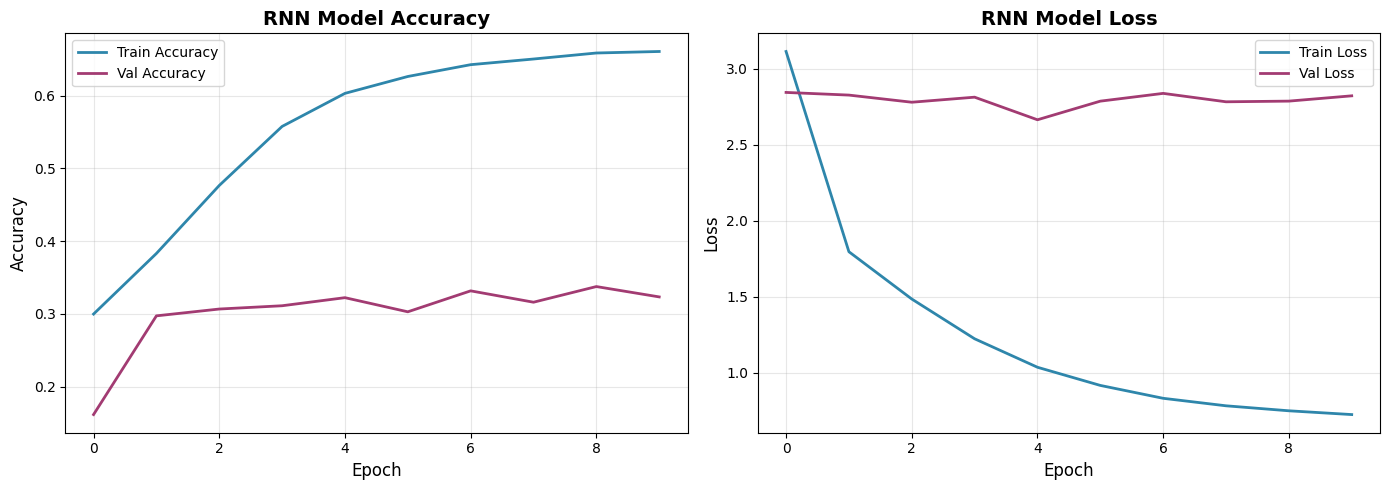


TRAINING COMPLETE - BASELINE RNN MODEL
✓ Final Training Accuracy: 0.6608
✓ Final Validation Accuracy: 0.3233
✓ Total Parameters: 38,021
✓ Training Epochs: 10

This RNN model serves as the baseline for comparison with
LSTM (Member 3) and Transformer (Member 2) architectures.

Metrics saved as 'rnn_training_metrics.png'


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

vocab_size = len(VOCAB)
embedding_dim = 64
hidden_units = 128
max_seq_len = X.shape[1]
dropout_rate = 0.2

print("="*60)
print("RNN AUTO-CORRECT MODEL - BASELINE")
print("="*60)
print(f"Vocabulary size: {vocab_size}")
print(f"Embedding dimension: {embedding_dim}")
print(f"RNN hidden units: {hidden_units}")
print(f"Max sequence length: {max_seq_len}")
print(f"Training samples: {X.shape[0]}")
print(f"Dropout rate: {dropout_rate}") 
print("="*60)

inputs = Input(shape=(max_seq_len,), name='input_layer')

x = Embedding(
    input_dim=vocab_size, 
    output_dim=embedding_dim, 
    mask_zero=True,
    name='embedding_layer'
)(inputs)

x = Dropout(dropout_rate, name='embedding_dropout')(x)

x = SimpleRNN(
    hidden_units, 
    return_sequences=True,
    name='rnn_layer'
)(x)

x = Dropout(dropout_rate, name='rnn_dropout')(x)

outputs = Dense(vocab_size, activation='softmax', name='output_layer')(x)

rnn_model = Model(inputs=inputs, outputs=outputs, name='RNN_AutoCorrect')


rnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\n" + "="*60)
print("MODEL ARCHITECTURE")
print("="*60)
rnn_model.summary()

Y_expanded = np.expand_dims(Y_out, -1)

print("\n" + "="*60)
print("DATA SHAPES")
print("="*60)
print(f"X shape (input typos): {X.shape}")
print(f"Y shape (target corrections): {Y_expanded.shape}")


callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        verbose=1,
        min_lr=1e-6
    )
]


print("\n" + "="*60)
print("TRAINING RNN MODEL")
print("="*60)
history = rnn_model.fit(
    X, Y_expanded,
    batch_size=64,
    epochs=30,  
    validation_split=0.15,
    callbacks=callbacks, 
    verbose=1
)

def predict_correction(typo_word):
    encoded = pad_sequence(encode_string(typo_word), max_seq_len)
    X_test = np.array([encoded])
    
    preds = rnn_model.predict(X_test, verbose=0)
    
    pred_indices = np.argmax(preds[0], axis=-1)
    
    corrected_chars = []
    for idx in pred_indices:
        char = itos[idx]
        if char not in ['<pad>', '<sos>', '<eos>']:
            corrected_chars.append(char)
    
    return ''.join(corrected_chars)

print("\n" + "="*60)
print("TESTING PREDICTIONS")
print("="*60)

test_typos = [
    'pritn', 'whiel', 'reutrn', 'fo', 'esle', 'def', 
    'inpt', 'rnage', 'iff', 'elfi', 'ontinue', 'braek'
]

print(f"\n{'Typo':<15} → {'Predicted':<15} {'Status'}")
print("-" * 50)

for typo in test_typos:
    corrected = predict_correction(typo)
    status = "✓" if len(corrected) > 0 else "✗"
    print(f"{typo:<15} → {corrected:<15} {status}")


print("\n" + "="*60)
print("VALIDATION SET EVALUATION")
print("="*60)

split_idx = int(0.85 * len(X))
X_val = X[split_idx:]
Y_val = Y_expanded[split_idx:]

val_loss, val_accuracy = rnn_model.evaluate(X_val, Y_val, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


print("\n" + "="*60)
print("GENERATING TRAINING PLOTS")
print("="*60)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', 
         linewidth=2, color='#2E86AB')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', 
         linewidth=2, color='#A23B72')
plt.title('RNN Model Accuracy', fontsize=14, fontweight='bold') 
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3) 

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', 
         linewidth=2, color='#2E86AB')
plt.plot(history.history['val_loss'], label='Val Loss', 
         linewidth=2, color='#A23B72')
plt.title('RNN Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('rnn_training_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*60)
print("TRAINING COMPLETE - BASELINE RNN MODEL")
print("="*60)
print(f"✓ Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"✓ Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"✓ Total Parameters: {rnn_model.count_params():,}")
print(f"✓ Training Epochs: {len(history.history['loss'])}")
print("="*60)
print("\nThis RNN model serves as the baseline for comparison with")
print("LSTM (Member 3) and Transformer (Member 2) architectures.")
print("\nMetrics saved as 'rnn_training_metrics.png'")
print("="*60)

